In [1]:
import pandas as pd
import numpy as np
import re
import math

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import natural language processing libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Processing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

# Model Evaluation Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Dimensionality Reduction libraries
from sklearn.decomposition import PCA

# Import pipeline library
from sklearn.pipeline import Pipeline

from tempfile import mkdtemp

In [2]:
# Import warnings and supress them
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure Pandas to show all columns / rows
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
# Set column max width larger
pd.set_option('display.max_colwidth', 200)

In [4]:
# Set up matplotlib to use nice styles
plt.style.use('ggplot')

In [5]:
# Load data from phishing email csv
email_df = pd.read_csv('./data/phishing_all_data_clean_4.csv')

In [6]:
email_df.shape

(12401, 6)

In [7]:
email_df['phishing'].value_counts()

0    6743
1    5658
Name: phishing, dtype: int64

In [8]:
X = email_df.drop(columns=['phishing'])
y = email_df.loc[:, ['phishing']]

In [9]:
X_remainder, X_test, y_remainder, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=1337,
    test_size=0.2,
)
X_remainder.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_remainder.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X_remainder,
    y_remainder,
    stratify=y_remainder,
    random_state=1337,
    test_size=0.2,
)
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_validation.reset_index(drop=True, inplace=True)

In [11]:
y_train

,phishing
0,0
1,0
2,0
3,1
4,1
...,...
7931,0
7932,1
7933,0
7934,1


In [12]:
X_train[y_train['phishing'] == 1].sample(10)

,content,unsecure_link_count,secure_link_count,numbers_count,word_count
6828,Jean The Account Audit Manager De Habitat Dear Beloved I that all is well with you and your family Please let this do be a surprise proposal to you because i got your contact information fro the i...,0,0,6,272
7702,Upon your interest I will forward you company contact immediately and tell you what to do as will argue well Respectfully yours JOY partner un bravo con jumpy it art,0,0,2,31
7730,Good day You may be surprise to receive this since you do not know me I am the son of the late president of Democratic Republic Of President now The Republic of under the leadership of the son of ...,0,0,19,334
4765,Dear name is am working in an country got your contact via the and felt you may be willing to pursue this with me proposal may sound strange to you or probably you may even think it is a of lots o...,0,0,23,130
2682,Dear Sir I am a Barrister and a member of our contact me through Business and my insistence on you Hence I made up my mind to introduce this in confidence for the mutual benefit of both The of Sev...,0,0,9,224
5420,STRICTLY Dear am highly upon strict recommendation to write you this very urgent and confidential letter do hope my letter will not embarrass you since I had no previous correspondence with you ho...,0,0,52,456
6429,I am from I am married to of blessed memory who worked with embassy in for nine before he in the year We were married for eleven without a child he after a brief illness that only four days Before...,0,0,5,551
1133,Dear Partner I happy to inform you about my success in getting those funds transferred under the operation of a new partner from Presently i in pan for investment with my own share of the total su...,0,0,5,126
4010,FROM MISS IVORY COAST COTE APPEAL FOR URGENT ASSISTANCE I am MISS DUKE the only daughter of late DUKE My father was a very wealth cocoa merchant in the economic capital of Ivory Coast my father du...,0,0,10,517
1596,IRREVOCABLE RELEASE OF YOUR have actually been authorized by the newly UN secretary general and the governing body of the UNITED monetary unit to investigate delay of your inheritance fund and in ...,0,0,5,215


In [13]:
X_validation[y_validation['phishing'] == 1]

,content,unsecure_link_count,secure_link_count,numbers_count,word_count
0,FROM LEE THE MANAGER FOREIGN REMITTANCE DEPARTMENT DEVELOPMENT BANK DEAR PARTNER TOP SECRET I AM LEE THE MANAGER IN CHARGE OF AND ACCOUNTING SECTION OF DEVELOPMENT BANK DEVELOPMENT BANK WEST WITH ...,1,0,57,504
2,Hello friend Please bear with me for now What I have may be of interest to you It is a business proposal that will be beneficial to you and me I live in United Kingdom I am old and I have been wor...,1,0,9,218
3,Dear Friend I am Regional Manager of Bank and also the personal account officer of Late Stella the wife of Who last year of in while trying to undergo medical surgery She made a fixed deposit in t...,1,0,7,170
4,Management Dear Treasury Management user Our Technical Unit is doing a Banking update By following the link below you will open the procedure of the user confirmation portal confirm banking Confir...,2,0,2,154
7,Dear friend I am Henry manager audit account department of Development Bank A In my department we discovered an abandoned sum of MILLION TH REE HUNDRED THOUSAND UNITED in an that to one of our for...,0,0,6,259
8,From Maria I Am A But Am In refugee camp Cote maria yahoo One I am a girl of old my name is Maria the child of Gift I am an I lost my a couple of the last war in and now i am here in cote the refu...,2,0,9,386
11,FREE MOVIE This advertisement is being sent by a Party where you have to receive or To please follow as provided by the sender at the bottom of this CLAIM YOUR MOVIE CLAIM YOUR MOVIE You are this ...,0,0,7,95
13,Good Day You may be surprise to receive this since you do not know me I am the son of the late president of Democratic Republic Of President now The Republic of under the leadership of the son of ...,0,0,20,333
14,Salutation respect pour de assistance de importance aide la migration la fortune ai de mon re sierra de la unique funt Bah sa mort mon re tait extraction or de la de en Sierra fi la mine de or ass...,1,0,115,190
15,Attention Sir I do for see the surprise this letter will bring to you as it comes from a stranger How ever be rest assured that it comes with the best of How ever your address was courtesy of a bu...,0,0,14,404


In [14]:
phishing_df = X_remainder[y_remainder['phishing'] == 1].reset_index(drop=True)
ham_df = X_remainder[y_remainder['phishing'] == 0].reset_index(drop=True)

In [15]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rosswillett/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def custom_tokenizer(text):
    # allow alphabetical characters and spaces only
    processed_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Filter out additional spaces
    processed_text = re.sub(r'\s\s*', ' ', processed_text)
    
    # split sentence into words
    listofwords = processed_text.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

## Analyzing Email Words

### Analyzing Top Phishing Words

In [17]:
phishing_word_vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
)
phishing_word_vectorizer.fit(phishing_df['content'])
phishing_word_vectorized = phishing_word_vectorizer.transform(phishing_df['content'])

In [18]:
phishing_word_df = pd.DataFrame(
    data=phishing_word_vectorized.toarray(),
    columns=phishing_word_vectorizer.get_feature_names_out(),
)
phishing_word_sum_df = pd.DataFrame(
    {"counts": phishing_word_vectorized.toarray().sum(axis=0)},
    index=phishing_word_vectorizer.get_feature_names_out(),
).sort_values("counts", ascending=False)

In [19]:
phishing_word_df

aa  aba  abac  abandon  abas  abb  abba  abbot  abduct  abe  aberr  \
0      0    0     0        0     0    0     0      0       0    0      0   
1      0    0     0        0     0    0     0      0       0    0      0   
2      0    0     0        0     0    0     0      0       0    0      0   
3      0    0     0        0     0    0     0      0       0    0      0   
4      0    0     0        0     0    0     0      0       0    0      0   
...   ..  ...   ...      ...   ...  ...   ...    ...     ...  ...    ...   
4521   0    0     0        0     0    0     0      0       0    0      0   
4522   0    0     0        0     0    0     0      0       0    0      0   
4523   0    0     0        0     0    0     0      0       0    0      0   
4524   0    0     0        0     0    0     0      0       0    0      0   
4525   0    0     0        0     0    0     0      0       0    0      0   

      abey  abi  abid  abil  abl  ablaz  abnorm  aboard  abod  aborad  abort  \
0        0    0     0     0    0      0       0       0     0       0      0   
1        0    0     0     0    0      0       0       0     0       0      0   
2        0    0     0     0    0      0       0       0     0       0      0   
3        0    0     0     0    0      0       0       0     0       0      0   
4        0    0     0     0    0      0       0       0     0       0      0   
...    ...  ...   ...   ...  ...    ...     ...     ...   ...     ...    ...   
4521     0    0     0     0    0      0       0       0     0       0      0   
4522     0    0     0     0    0      0       0       0     0       0      0   
4523     0    0     0     0    0      0       0       0     0       0      0   
4524     0    0     0     0    0      0       0       0     0       0      0   
4525     0    0     0     0    0      0       0       0     0       0      0   

      abound  abreast  abroad  abscond  absenc  absent  absolut  absolv  \
0          0        0       0        0       0       0        0       0   
1          0        0       0        0       0       0        0       0   
2          0        0       0        0       0       0        0       0   
3          0        0       0        0       0       0        0       0   
4          0        0       0        0       0       0        0       0   
...      ...      ...     ...      ...     ...     ...      ...     ...   
4521       0        0       0        0       0       0        0       0   
4522       0        0       0        0       0       0        0       0   
4523       0        0       0        0       0       0        0       0   
4524       0        0       0        0       0       0        0       0   
4525       0        0       0        0       0       0        1       0   

      absorb  abstain  abstract  abstrus  abu  abund  abundantli  abus  \
0          0        0         0        0    0      0           0     0   
1          0        0         0        0    0      0           0     0   
2          0        0         0        0    3      0           0     0   
3          0        0         0        0    0      0           0     0   
4          0        0         0        0    0      0           0     0   
...      ...      ...       ...      ...  ...    ...         ...   ...   
4521       0        0         0        0    0      0           0     0   
4522       0        0         0        0    0      0           0     0   
4523       0        0         0        0    0      0           0     0   
4524       0        0         0        0    0      0           0     0   
4525       0        0         0        0    0      0           0     0   

      academ  academi  acced  accept  access  accid  accident  accommod  \
0          0        0      0       0       0      0         0         0   
1          0        0      0       0       0      0         0         0   
2          0        0      0       0       0      0         0         0   
3          0        0      0       0      

In [20]:
phishing_word_sum_df

,counts
account,11109
bank,8635
money,7850
us,5988
fund,5815
...,...
reve,1
reus,1
retun,1
retrogress,1


### Analyzing Top Ham Emails

In [21]:
ham_word_vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
)
ham_word_vectorizer.fit(ham_df['content'])
ham_word_vectorized = ham_word_vectorizer.transform(ham_df['content'])

In [22]:
ham_word_df = pd.DataFrame(
    data=ham_word_vectorized.toarray(),
    columns=ham_word_vectorizer.get_feature_names_out(),
)
ham_word_sum_df = pd.DataFrame(
    {"counts": ham_word_vectorized.toarray().sum(axis=0)},
    index=ham_word_vectorizer.get_feature_names_out(),
).sort_values("counts", ascending=False)

In [23]:
ham_word_df

aa  aba  aback  abandon  abb  abba  abbot  abbrevi  abduct  abe  aberr  \
0      0    0      0        0    0     0      0        0       0    0      0   
1      0    0      0        0    0     0      0        0       0    0      0   
2      0    0      0        0    0     0      0        0       0    0      0   
3      0    0      0        0    0     0      0        0       0    0      0   
4      0    0      0        0    0     0      0        0       0    0      0   
...   ..  ...    ...      ...  ...   ...    ...      ...     ...  ...    ...   
5389   0    0      0        0    0     0      0        0       0    0      0   
5390   0    0      0        0    0     0      0        0       0    0      0   
5391   0    0      0        0    0     0      0        0       0    0      0   
5392   0    0      0        0    0     0      0        0       0    0      0   
5393   0    0      0        0    0     0      0        0       0    0      0   

      abet  abey  abhorr  abid  abil  abject  abl  abnorm  aboard  abod  \
0        0     0       0     0     0       0    0       0       0     0   
1        0     0       0     0     0       0    0       0       0     0   
2        0     0       0     0     0       0    0       0       0     0   
3        0     0       0     0     0       0    0       0       0     0   
4        0     0       0     0     0       0    0       0       0     0   
...    ...   ...     ...   ...   ...     ...  ...     ...     ...   ...   
5389     0     0       0     0     0       0    0       0       0     0   
5390     0     0       0     0     0       0    0       0       0     0   
5391     0     0       0     0     0       0    0       0       0     0   
5392     0     0       0     0     0       0    0       0       0     0   
5393     0     0       0     0     0       0    0       0       0     0   

      abolish  abolit  abomin  abort  abound  abreast  abroad  abruptli  \
0           0       0       0      0       0        0       0         0   
1           0       0       0      0       0        0       0         0   
2           0       0       0      0       0        0       0         0   
3           0       0       0      0       0        0       0         0   
4           0       0       0      0       0        0       0         0   
...       ...     ...     ...    ...     ...      ...     ...       ...   
5389        0       0       0      0       0        0       0         0   
5390        0       0       0      0       0        0       0         0   
5391        0       0       0      0       0        0       0         0   
5392        0       0       0      0       0        0       0         0   
5393        0       0       0      0       0        0       0         0   

      absenc  absent  absente  absolut  absorb  absorpt  abstain  abstent  \
0          0       0        0        0       0        0        0        0   
1          0       0        0        0       0        0        0        0   
2          0       0        0        0       0        0        0        0   
3          0       0        0        0       0        0        0        0   
4          0       0        0        0       0        0        0        0   
...      ...     ...      ...      ...     ...      ...      ...      ...   
5389       0       0        0        0       0        0        0        0   
5390       0       0        0        0       0        0        0        0   
5391       0       0        0        0       0        0        0        0   
5392       0       0        0        0       0        0        0        0   
5393       0       0        0        0       0        0        0        0   

      abstin  abstract  abstrus  absurd  absurdli  abu  abund  abundantli  \
0          0         0        0       0         0    0      0           0   
1          0         0        0       0         0    0      0           0   
2          0         0        0       0         0    0      0           0   
3         

In [24]:
ham_word_sum_df

,counts
one,1983
would,1899
time,1892
new,1792
state,1758
...,...
lurch,1
lunt,1
lunchroom,1
simplic,1


### Analyzing Phishing NGrams

In [25]:
phishing_ngram_vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    min_df=10,
    ngram_range=(2, 3),
)
phishing_ngram_vectorizer.fit(phishing_df['content'])
phishing_ngram_vectorized = phishing_ngram_vectorizer.transform(phishing_df['content'])

In [26]:
phishing_ngram_df = pd.DataFrame(
    {"counts": phishing_ngram_vectorized.toarray().sum(axis=0)},
    index=phishing_ngram_vectorizer.get_feature_names_out(),
).sort_values("counts", ascending=False)

In [27]:
phishing_ngram_df.head(30)

,counts
next kin,2485
bank account,1264
secur compani,1022
hundr thousand,725
transfer money,615
pleas repli,589
million five,588
five hundr,578
look forward,555
transfer fund,543


### Analyzing Ham NGrams

In [28]:
ham_ngram_vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    min_df=10,
    ngram_range=(2, 3),
)
ham_ngram_vectorizer.fit(ham_df['content'])
ham_ngram_vectorized = ham_ngram_vectorizer.transform(ham_df['content'])

In [29]:
ham_ngram_df = pd.DataFrame(
    {"counts": ham_ngram_vectorized.toarray().sum(axis=0)},
    index=ham_ngram_vectorizer.get_feature_names_out(),
).sort_values("counts", ascending=False)

In [30]:
ham_ngram_df.head(30)

,counts
state depart,382
ie ie,382
ie mailman,366
ie ie mailman,364
inform list,351
list maintain,350
list maintain ie,350
inform list maintain,350
maintain ie,350
mailman fork,336


### Look at Non-Vectorized Columns

In [31]:
email_df

,content,phishing,unsecure_link_count,secure_link_count,numbers_count,word_count
0,Supply Quality China EXCLUSIVE at Unbeatable Price Dear Sir We are to inform you as one of China export import ne company Group The Group its specialize in the and of dimension stone slab and and ...,1,0,0,10,131
1,over me know,0,0,0,0,3
2,Dear Friend to you I wish to accost you with a request that would be of immense benefit to both of us Being an executor of it is possible that we may be to make fortune out of our client when we c...,1,0,0,9,385
3,BANK BRANCH CENTRAL HONG HONG Let me start by myself I am director of of the Bank I have an urgent business suggestion for you I honestly apologize and hope I do not cause you much embarrassment b...,1,1,0,6,549
4,Not a surprising assessment from Embassy,0,0,0,0,6
...,...,...,...,...,...,...
12396,You appear to be an application that wont properly display the graphical or version of our newsletter Because we want you to enjoy reading News we recommend that you visit the following site and s...,0,2,0,40,1041
12397,Investor Dispatch Quote symbol Symbol My Portfolio Broker Live tech help NOW tech award million open News Top TECH lose again with earnings miss fell short of Wall Streets earnings and a worse tha...,0,0,0,136,496
12398,from The Register To from this daily news update see the at the end of this message are not free Patent holder grab And already up content Mac at upgrade Read my pony up content web kimono But Hen...,0,24,0,60,298
12399,Hi Everyone There seem to be several in our class A few ago I ran into he me if I would go to the reunion picnic with him His and my wouldnt know anyone there so I said yes Yesterday he told me he...,0,2,0,2,91


In [32]:
plot_df = email_df.copy()
plot_df['Fraud'] = np.where(email_df['phishing'] == 1, 'Fraud', 'Ham')

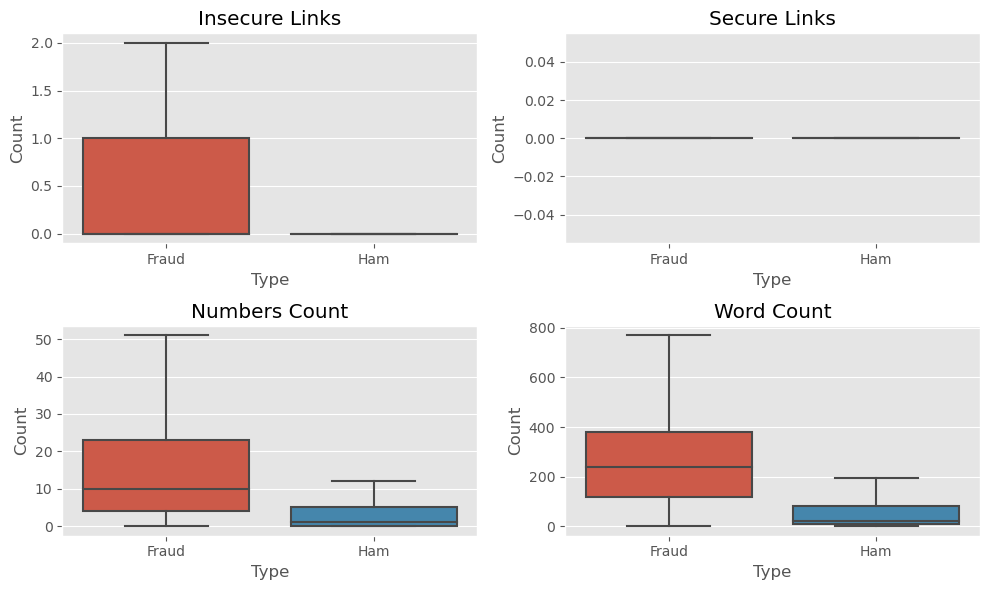

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

plt.subplot(2, 2, 1)
snsplot = sns.boxplot(
    x='Fraud',
    y='unsecure_link_count',
    data=plot_df,
    showfliers=False
)
plt.title('Insecure Links')
plt.ylabel('Count')
plt.xlabel('Type')

plt.subplot(2, 2, 2)
snsplot = sns.boxplot(
    x='Fraud',
    y='secure_link_count',
    data=plot_df,
    showfliers=False
)
plt.title('Secure Links')
plt.ylabel('Count')
plt.xlabel('Type')


plt.subplot(2, 2, 3)
snsplot = sns.boxplot(
    x='Fraud',
    y='numbers_count',
    data=plot_df,
    showfliers=False
)
plt.title('Numbers Count')
plt.ylabel('Count')
plt.xlabel('Type')

plt.subplot(2, 2, 4)
snsplot = sns.boxplot(
    x='Fraud',
    y='word_count',
    data=plot_df,
    showfliers=False
)
plt.title('Word Count')
plt.ylabel('Count')
plt.xlabel('Type')

fig.tight_layout()

plt.show()

In [34]:
fig.savefig('cont_var_counts', bbox_inches="tight")

### Compare Fraud to Ham Counts

In [35]:
ham_word_formatted = ham_word_sum_df.copy()
ham_word_formatted = ham_word_formatted.reset_index()
ham_word_formatted = ham_word_formatted.rename({'index': 'Word', 'counts': 'Ham'}, axis=1)
phishing_word_formatted = phishing_word_sum_df.copy()
phishing_word_formatted = phishing_word_formatted.reset_index()
phishing_word_formatted = phishing_word_formatted.rename({'index': 'Word', 'counts': 'Fraud'}, axis=1)

In [37]:
top_comparison_count_df = pd.merge(left=ham_word_formatted, right=phishing_word_formatted, how='outer', on='Word')
top_comparison_count_df.fillna(0, inplace=True)

In [40]:
top_comparison_count_df

,Word,Ham,Fraud
0,one,1983.0,2423.0
1,would,1899.0,1589.0
2,time,1892.0,1394.0
3,new,1792.0,1023.0
4,state,1758.0,768.0
...,...,...,...
12378,revent,0.0,1.0
12379,revend,0.0,1.0
12380,reve,0.0,1.0
12381,retun,0.0,1.0


In [41]:
top_ham_comparison_count_df = top_comparison_count_df.sort_values(by='Ham', ascending=False).head(10)

In [42]:
top_ham_compare_plot_pd = top_ham_comparison_count_df.melt(id_vars='Word').rename(columns=str.title)

In [43]:
top_ham_compare_plot_pd

,Word,Variable,Value
0,one,Ham,1983.0
1,would,Ham,1899.0
2,time,Ham,1892.0
3,new,Ham,1792.0
4,state,Ham,1758.0
5,work,Ham,1739.0
6,get,Ham,1667.0
7,list,Ham,1531.0
8,like,Ham,1529.0
9,use,Ham,1468.0


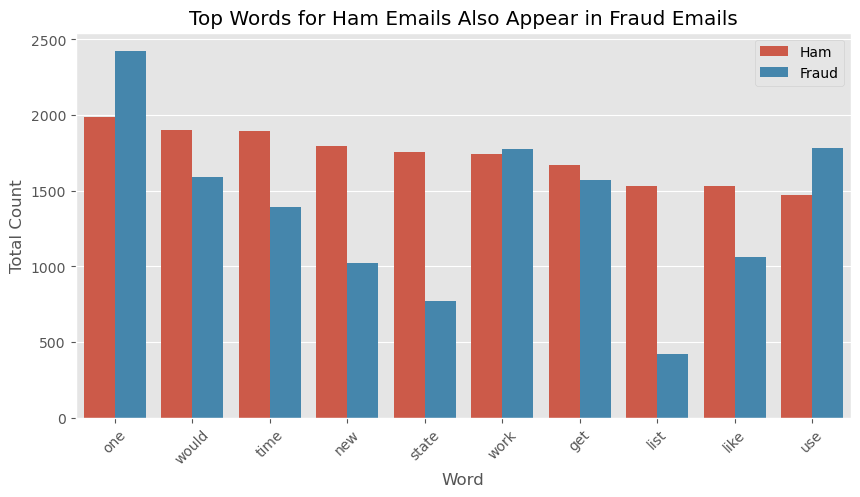

In [765]:
plt.figure(figsize=(10, 5))
snsplot = sns.barplot(x='Word', y='Value', hue='Variable', data=top_ham_compare_plot_pd)
plt.title("Top Words for Ham Emails Also Appear in Fraud Emails")
plt.xlabel('Word')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [766]:
snsplot.figure.savefig('top_ten_ham', bbox_inches="tight")

In [758]:
top_fraud_comparison_count_df = top_comparison_count_df.sort_values(by='Fraud', ascending=False).head(10)

In [759]:
top_fraud_compare_plot_pd = top_fraud_comparison_count_df.melt(id_vars='Word').rename(columns=str.title)

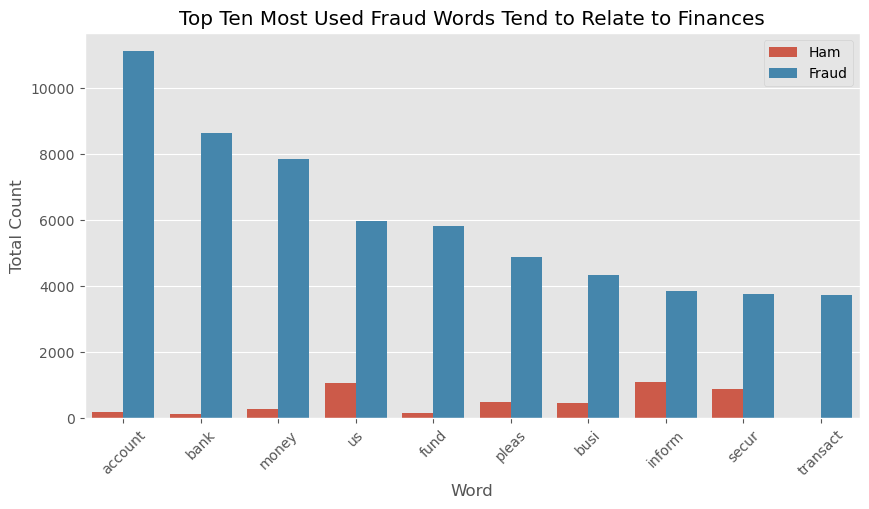

In [760]:
plt.figure(figsize=(10, 5))
snsplot = sns.barplot(x='Word', y='Value', hue='Variable', data=top_fraud_compare_plot_pd)
plt.title('Top Ten Most Used Fraud Words Tend to Relate to Finances')
plt.xlabel('Word')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [761]:
snsplot.figure.savefig('top_ten_fraud', bbox_inches="tight")